In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaning_concursos_publicos_v2.csv')

In [3]:
df

,Unnamed: 0,Instituto_Orgao,Vagas,Salario_Maximo,Escolaridade,Cidade,Estado
0,0,Prefeitura de Boca do Acre (AM),326.0,3400.00,"fundamental, médio e superior",boca do acre,amazonas
1,1,Câmara de Tunápolis,1.0,1789.92,superior,tunápolis,santa catarina
2,2,Prefeitura de Ouroeste (SP),31.0,2992.36,"fundamental, médio e superior",ouroeste,são paulo
3,3,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
4,4,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
...,...,...,...,...,...,...,...
162,166,Prefeitura de Bertioga (SP),100.0,2513.07,médio,bertioga,são paulo
163,167,Prefeitura de Palmas (TO),50.0,3440.77,médio,palmas,tocantins
164,168,Fundação Estadual de Proteção Ambiental Henriq...,56.0,6646.96,"médio, técnico e superior",várias cidades,rio grande do sul
165,169,Prefeitura de Capivari (SP),57.0,15519.11,"fundamental, médio e superior",capivari,são paulo


In [4]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
df

,Instituto_Orgao,Vagas,Salario_Maximo,Escolaridade,Cidade,Estado
0,Prefeitura de Boca do Acre (AM),326.0,3400.00,"fundamental, médio e superior",boca do acre,amazonas
1,Câmara de Tunápolis,1.0,1789.92,superior,tunápolis,santa catarina
2,Prefeitura de Ouroeste (SP),31.0,2992.36,"fundamental, médio e superior",ouroeste,são paulo
3,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
4,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
...,...,...,...,...,...,...
162,Prefeitura de Bertioga (SP),100.0,2513.07,médio,bertioga,são paulo
163,Prefeitura de Palmas (TO),50.0,3440.77,médio,palmas,tocantins
164,Fundação Estadual de Proteção Ambiental Henriq...,56.0,6646.96,"médio, técnico e superior",várias cidades,rio grande do sul
165,Prefeitura de Capivari (SP),57.0,15519.11,"fundamental, médio e superior",capivari,são paulo


In [6]:
df['Escolaridade'].unique()

array(['fundamental, médio e superior', 'superior', 'médio e superior',
       'fundamental, médio, técnico e superior',
       'médio, técnico e superior', 'médio, superior e magistério',
       'fundamental e médio', 'doutorado', 'médio',
       'fundamental e superior', 'técnico e superior', 'médio e técnico',
       'fundamental', 'médio , superior', 'médio, superior e doutorado',
       'fundamental , superior',
       'alfabetizado, fundamental, médio e superior'], dtype=object)

In [7]:
esc_df = df.copy()

In [9]:
esc_df

,Instituto_Orgao,Vagas,Salario_Maximo,Escolaridade,Cidade,Estado
0,Prefeitura de Boca do Acre (AM),326.0,3400.00,"fundamental, médio e superior",boca do acre,amazonas
1,Câmara de Tunápolis,1.0,1789.92,superior,tunápolis,santa catarina
2,Prefeitura de Ouroeste (SP),31.0,2992.36,"fundamental, médio e superior",ouroeste,são paulo
3,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
4,Prefeitura de Olinda (PE),230.0,3867.47,superior,olinda,pernambuco
...,...,...,...,...,...,...
162,Prefeitura de Bertioga (SP),100.0,2513.07,médio,bertioga,são paulo
163,Prefeitura de Palmas (TO),50.0,3440.77,médio,palmas,tocantins
164,Fundação Estadual de Proteção Ambiental Henriq...,56.0,6646.96,"médio, técnico e superior",várias cidades,rio grande do sul
165,Prefeitura de Capivari (SP),57.0,15519.11,"fundamental, médio e superior",capivari,são paulo


In [10]:
def dummies(texto):
    if 'magistério' in texto:
        texto = texto.replace(texto, '6')
        return texto
    elif 'doutorado' in texto:
        texto = texto.replace(texto, '5')
        return texto
    if 'superior' in texto:
        texto = texto.replace(texto, '4')
        return texto
    elif 'técnico' in texto:
        texto = texto.replace(texto, '3')
        return texto   
    elif 'médio' in texto:
        texto = texto.replace(texto, '2')
        return texto   
    elif 'fundamental' in texto:
        texto = texto.replace(texto, '1')
        return texto   

In [11]:
func1 = lambda x: dummies(x)
esc_df['Escolaridade'] = esc_df['Escolaridade'].apply(func1)    
    

In [12]:
esc_df

,Instituto_Orgao,Vagas,Salario_Maximo,Escolaridade,Cidade,Estado
0,Prefeitura de Boca do Acre (AM),326.0,3400.00,4,boca do acre,amazonas
1,Câmara de Tunápolis,1.0,1789.92,4,tunápolis,santa catarina
2,Prefeitura de Ouroeste (SP),31.0,2992.36,4,ouroeste,são paulo
3,Prefeitura de Olinda (PE),230.0,3867.47,4,olinda,pernambuco
4,Prefeitura de Olinda (PE),230.0,3867.47,4,olinda,pernambuco
...,...,...,...,...,...,...
162,Prefeitura de Bertioga (SP),100.0,2513.07,2,bertioga,são paulo
163,Prefeitura de Palmas (TO),50.0,3440.77,2,palmas,tocantins
164,Fundação Estadual de Proteção Ambiental Henriq...,56.0,6646.96,4,várias cidades,rio grande do sul
165,Prefeitura de Capivari (SP),57.0,15519.11,4,capivari,são paulo


In [13]:
def regiao(estado):
    
    nordeste = ['alagoas', 'bahia', 'ceará', 'paraíba', 'pernambuco', 'rio grande do norte', 'sergipe']
    norte = ['amazonas', 'pará', 'tocantins']
    co = ['distrito federal', 'goiás', 'mato grosso', 'mato grosso do sul']
    sudeste = ['espírito santo', 'minas gerais', 'rio de janeiro', 'são paulo']
    sul = ['paraná', 'rio grande do sul', 'santa catarina']
    
    if estado in nordeste:
        return 'NORDESTE'
    elif estado in norte:
        return 'NORTE'
    elif estado in co:
        return 'CENTRO-OESTE'
    elif estado in sudeste:
        return 'SUDESTE'
    elif estado in sul:
        return 'SUL'
    return None

In [14]:
esc_df['Regiao'] = esc_df.apply(lambda x :regiao(x['Estado']), axis=1)

In [15]:
esc_df

,Instituto_Orgao,Vagas,Salario_Maximo,Escolaridade,Cidade,Estado,Regiao
0,Prefeitura de Boca do Acre (AM),326.0,3400.00,4,boca do acre,amazonas,NORTE
1,Câmara de Tunápolis,1.0,1789.92,4,tunápolis,santa catarina,SUL
2,Prefeitura de Ouroeste (SP),31.0,2992.36,4,ouroeste,são paulo,SUDESTE
3,Prefeitura de Olinda (PE),230.0,3867.47,4,olinda,pernambuco,NORDESTE
4,Prefeitura de Olinda (PE),230.0,3867.47,4,olinda,pernambuco,NORDESTE
...,...,...,...,...,...,...,...
162,Prefeitura de Bertioga (SP),100.0,2513.07,2,bertioga,são paulo,SUDESTE
163,Prefeitura de Palmas (TO),50.0,3440.77,2,palmas,tocantins,NORTE
164,Fundação Estadual de Proteção Ambiental Henriq...,56.0,6646.96,4,várias cidades,rio grande do sul,SUL
165,Prefeitura de Capivari (SP),57.0,15519.11,4,capivari,são paulo,SUDESTE


In [16]:
esc_df.describe()

,Vagas,Salario_Maximo
count,167.000000,167.000000
mean,127.540347,7562.539281
std,479.851052,6470.370734
min,1.000000,34.420000
25%,10.000000,3069.365000
50%,32.000000,5421.050000
75%,115.000000,9990.000000
max,6000.000000,33689.110000


<AxesSubplot:>

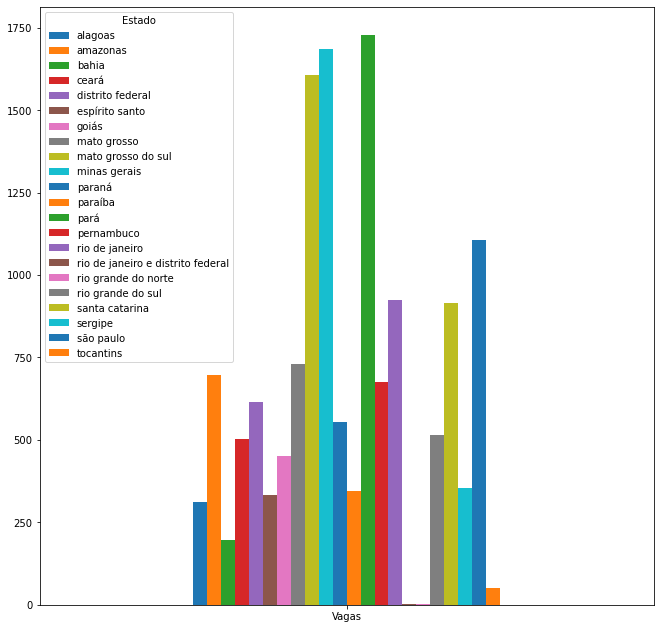

In [31]:
vagas_1 = esc_df.groupby(['Estado'])['Vagas'].sum()
vagas_1_pivot = esc_df.pivot_table(columns=['Estado'], values='Vagas', aggfunc='sum')
vagas_1_pivot.drop(['todo o país', 'vários estados'], axis=1, inplace=True)
vagas_1_pivot.plot(kind="bar", subplots=False, figsize=(11, 11), legend=True, rot=0)


In [18]:
vagas_1_pivot

Estado,alagoas,amazonas,bahia,ceará,distrito federal,espírito santo,goiás,mato grosso,mato grosso do sul,minas gerais,...,pará,pernambuco,rio de janeiro,rio de janeiro e distrito federal,rio grande do norte,rio grande do sul,santa catarina,sergipe,são paulo,tocantins
Vagas,312.0,696.0,198.0,504.0,616.0,332.0,452.0,731.0,1606.0,1684.0,...,1727.0,676.0,924.0,1.08,1.158,514.0,914.0,355.0,1107.0,50.0


In [19]:
vagas_2 = esc_df.groupby(['Regiao'])['Vagas'].sum()
vagas_2

Regiao
CENTRO-OESTE    3405.000
NORDESTE        2391.158
NORTE           2473.000
SUDESTE         4047.000
SUL             1983.000
Name: Vagas, dtype: float64

In [20]:
esc_df['Regiao'].unique()

array(['NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'CENTRO-OESTE', None],
      dtype=object)

<AxesSubplot:>

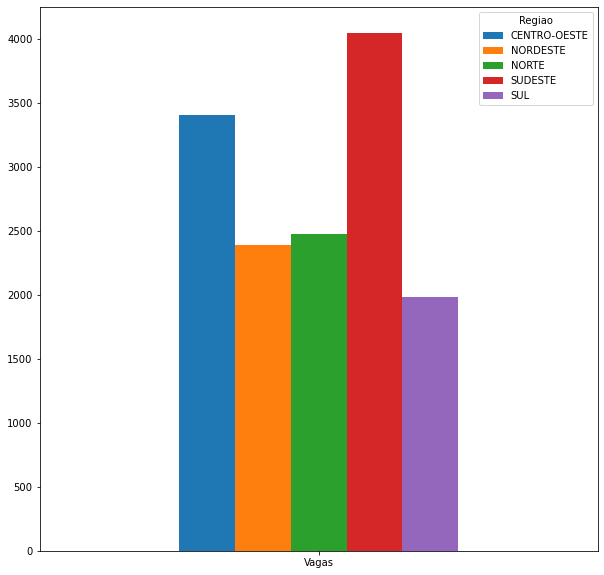

In [21]:
vagas_2_pivot = esc_df.pivot_table(columns=['Regiao'], values='Vagas', aggfunc='sum')
vagas_2_pivot.plot(kind="bar", subplots=False, figsize=(10, 10), legend=True, rot=0)

In [22]:
vagas_2_pivot

Regiao,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL
Vagas,3405.0,2391.158,2473.0,4047.0,1983.0


In [42]:
salario_1 = esc_df.groupby(['Escolaridade'])['Salario_Maximo'].mean()
salario_1

Escolaridade
1    2976.800000
2    2444.895000
3    3032.553333
4    8209.893517
5    8338.170000
6    1192.000000
Name: Salario_Maximo, dtype: float64

<AxesSubplot:>

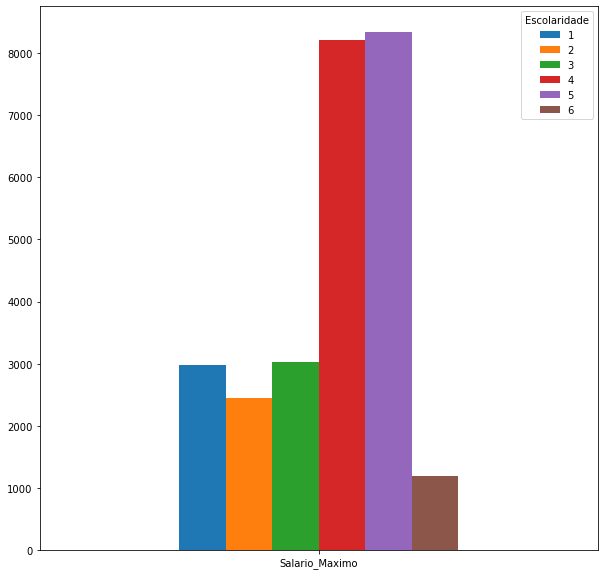

In [43]:
salario_1_pivot = esc_df.pivot_table(columns=['Escolaridade'], values='Salario_Maximo', aggfunc='mean')
salario_1_pivot.plot(kind="bar", subplots=False, figsize=(10, 10), legend=True, rot=0)

In [23]:
sizes = [23.8, 16.7, 17.3, 28.3, 13.9]
labels = 'CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'
explode = (0, 0, 0, 0.1, 0)

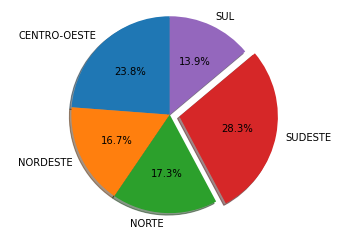

In [24]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

<AxesSubplot:xlabel='Escolaridade', ylabel='Count'>

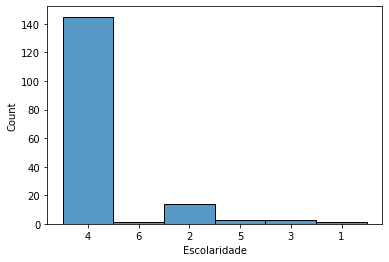

In [25]:
sns.histplot(esc_df['Escolaridade'])

<AxesSubplot:xlabel='Escolaridade', ylabel='Salario_Maximo'>

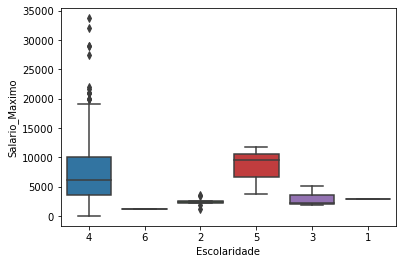

In [26]:
sns.boxplot(y=esc_df['Salario_Maximo'], x=esc_df['Escolaridade'])

[]

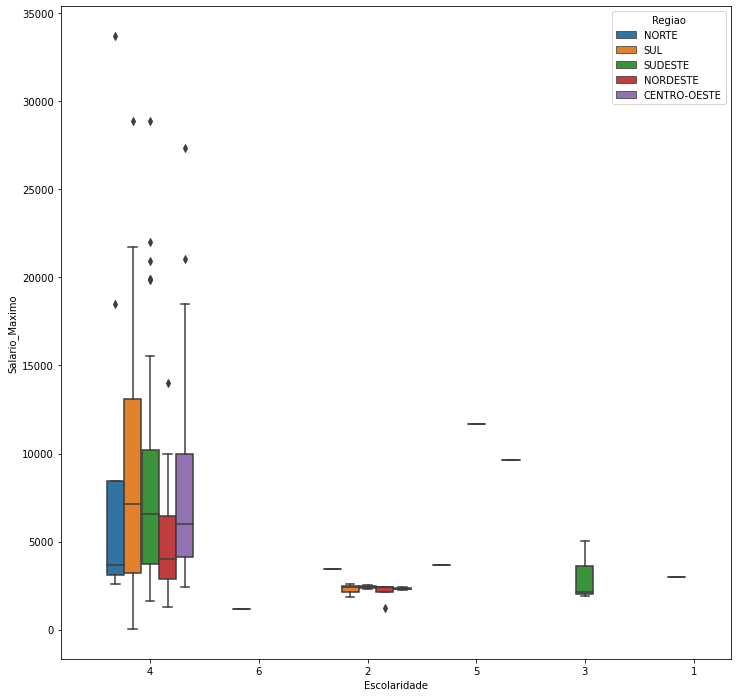

In [27]:
plt.figure(figsize=(12, 12))
ax = sns.boxplot(y=esc_df['Salario_Maximo'], x=esc_df['Escolaridade'], hue=esc_df['Regiao'])

ax.plot()


[]

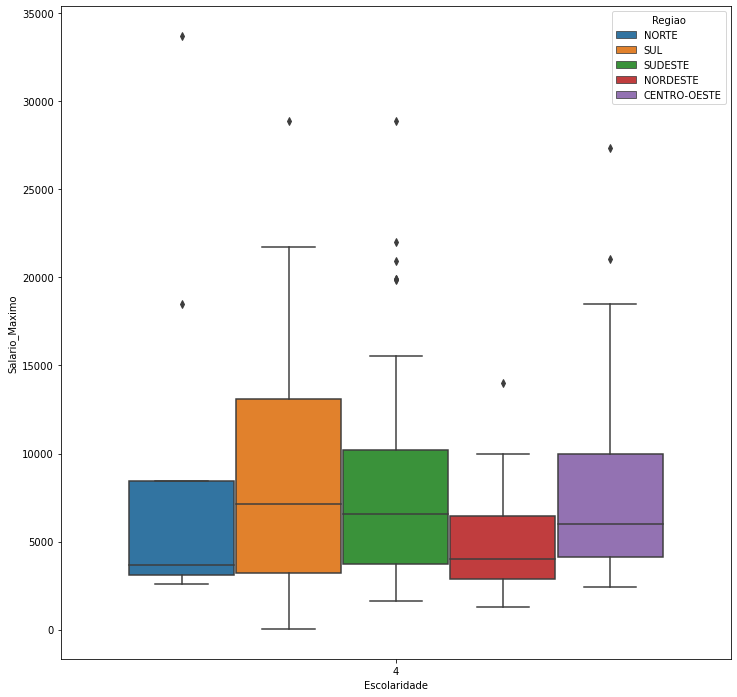

In [28]:
plt.figure(figsize=(12, 12))
ax = sns.boxplot(y=esc_df['Salario_Maximo'], x=esc_df['Escolaridade'], hue=esc_df['Regiao'])
ax.set(xlim=(-0.5,0.5))

ax.plot()


In [51]:
esc_df.to_csv('df_geolocation.csv')